<a href="https://colab.research.google.com/github/Vida0822/MachinLearning_Basic/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류 알고리즘 (Classification)

> 럭키백의 생선이 어떤 타깃에 속하는지 확률을 구해주세요! <br>
(생선의 길이, 높이, 무게, 대각선 길이, 대각선 무게가 주어진다)

즉, 특정 클래스에 속할 확률을 구하는 알고리즘으로(Y is Binary Variable), <br>
예측(Y-parameter) 뿐만 아니라 예측의 근거가 되는 확률(Y^-estimator)을 도출하는 것이다. <br>
해당 확률은 분류 모델이 얼마나 예측을 확신하는지 나타낸다.


<br>

### K-최근접 이웃 분류 (KNeighborsClassification)
이웃의 클래스 비율로 각 클래스별 확률을 도출한다. <br>
즉, 검사 대상 이웃들 중 가장 높은 비율을 차지하는 클래스가 나의 클래스이다. <br>

주변 이웃의 클래스 비율 각각 확인 = 이는 곧 나의 클래스별 예측 확률
  -> 내 클래스 예측(최고치)


#### 1) 데이터 준비 (수집, 가공, 전처리)

In [7]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


RAW 데이터를 준비한다(읽어온다).

In [ ]:
print(pd.unique(fish['Species'])) # Species 열에서 고유한 값 출력 : unique()
# 데이터 프레임에서 열을 선택하려면 원하는 열을 리스트로 나열한다 => 새로운 데이터프레임으로 반환

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


타킷 데이터에 2개 이상의 클래스가 포함된 문제를 '다중 분류'라고 부른다. <br>
사이킷런에선 편리하게도 문자열로 된 타깃값을 그대로 사용할 수 있다.

<br>

**+) 판다스** <br>

데이터 분석 라이브러리인 판다스의 데이터프레임(dataframe)은 판다스에서 제공하는 2차원 표 형식의 데이터 구조이다. <br>
넘파이처럼 다차원 배열을 다룰 수 있지만 통계와 그래프를 위한 메서드 등 훨씬 풍부한 기능을 제공한다. <br>
넘파이로 상호 변환이 쉽고 사이킷런과 호환성도 좋다.

<br>

In [9]:
# 입력 데이터
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5])

# 타깃 데이터
fish_target = fish['Species'].to_numpy()

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


입력 데이터와 타깃 데이터로 나눈다.

<br>

In [10]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

훈련 세트와 테스트 세트로 나눈다.

<br>

In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_input) # 훈련세트 통계값 반영

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input) # 훈련세트 통계값 사용

데이터 세트를 표준화 전처리

<br>

#### 2) 확률 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)

# 훈련
kn.fit(train_scaled, train_target)

# 평가
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


이웃 근접 모델을 훈련, 평가한다.

<br>

In [ ]:
print(kn.classes_) # 모델에 정렬된 타깃값 저장되어있음

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


※주의 : 문자열 타깃값을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벳 순으로 매겨진다 <br>
즉 모델에 저장된(listing)된 클래스 순서는 알파벳 순이다.

In [ ]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


But 친절하게도 순서와 관계없이 타깃값 자체만으로 예측을 출력한다 (not 클래스 순번). <br>
위 코드는 처음 5개 샘플의 타깃값을 예측한 것이다.

<br>

In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5]) # 해당 객체의 클래스별 확률 값 반환
print(np.round(proba, decimals=4)) # 소수점 넷째 자리까지 출력 (반올림)

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


이는 각 객체의 클래스별 확률값을 계산한 것이다. <br>
클래스 순서는 classes_속성의 순서와 같다.

<br>

In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4]) # 네번째 샘플  (2차원 배열로 넘겨줘야 하기에 슬라이싱 연산자 사용)
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


최근접 이웃 분류 모델에선, 가장 가까운 이웃의 비율을 확률로 계산한다

고려 대상 이웃 셈플 3개 중 'Roach'가 1개, 'Perch'가 2개이다. <br>
즉 해당 이웃들의 전체 클래스 중 'Perch'가 차지하는 비율은 곧 내 클래스가 'Perch'일 확률이며 <br>
같은 원리로, 내 클래스가 'Roach'일 예측확률은 1/3이다.<br>
Perch가 가장 높은 비율(2/3)을 차지하기에 내 클래스는 'Perch'로 예측한다. <br>


<br>

🤔 하지만 이는 상황에 따라 확률이라고 말하긴 좀 어색! <br>
주변과의 분포가 클래스 타입과 영향이 분명이 있어야 확률로 취급 가능. <br>
+ 이웃한 샘플의 클래스 비율이므로 항상 정해진 확률값만 출력
더 좋은 방법 필요하겠다!

<br>  

### 로지스틱 회귀 (Logistic Regression)

선형 회귀 (z = a x weight + b x length +... f )로 확률을 구하면 <br>
독립 변수 값에 따라 확률값(z)가 0보다 작거나 1보다 클 수도 있다. <br>
이는 '확률'이라는 개념과 어긋나기 때문에, 확률을 0~1 사이의 값으로 만들어 주는 후처리가 필요하다. <br>
이러한 역할을 시그모이드 함수(또는 로지스틱 함수)가 수행하며, 이러한 선형 회귀 방식을 Logistic Regression이라고 한다. <br>

+) 동일한 원리를 사용하는 Probit Regression도 존재 (적용 함수가 다르다)  

<br>

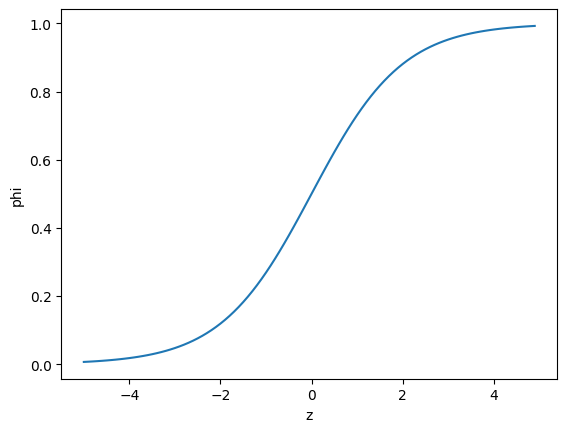

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# -5와 5 사이에 0.1 간격으로 배열 z를 만든다. (z = [-5, -4.9, -4.8..., 4.9, 5]) --> 이 부분이 나중엔 실제 선형 방정식 결과값으로 나옴
z = np.arange(-5,5,0.1)

# 해당 z 배열의 value point마다 시그모이드 함수를 계산한다 (exp() : 지수 함수 계산)
phi = 1 / (1+np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

로지스틱 함수는 선형 방정식의 결과값(z)를 인자로 받아 해당 음수 값만큼 자연 상수 e를 거듭제곱 하고 1을 더한 값의 역수를 취한다. <br>
이를 통해 확률을 0~1 사이의 값으로 만들며 위와 같은 그래프 형태를 띄게 한다.

<br>

#### 1) 이진 분류

두개의 클래스가 있을 때 양성 클래스가 될 확률을 바탕으로 자신의 클래스를 결정한다. <br>
이진 분류의 경우 시그모이드 함수 출력이 0.5 보다 크면 양성, 작으면 음성 클래스로 판단한다.

In [13]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') # True 또는 False인 배열 반환 --> 도미 또는 빙어인 행번호

# 해당 행번호의 객체(행)만 골라내어 훈련 세트
train_bream_smelt = train_scaled[bream_smelt_indexes] # 해당 행의 입력 데이터
target_bream_smelt = train_target[bream_smelt_indexes] # 해당 행의 테스트 데이터

도미와 빙어에 대한 행만 골라낸다. <br>
넘파이 배열에서의 행 선택은 True, False값을 전달하여 행을 골라낸다. (True인 것만 골라짐)

<br>


In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# 훈련
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

사이킷런에는 로지스틱 회귀 모델인 LogisticRegression을 사용한다.

<br>

In [16]:
print(lr.classes_) # 타깃값을 알파벳순으로 정렬하여 사용
print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


처음 5개 샘플의 음성,양성 클래스(도미, 빙어)의 예측 확률이며 <br>
양성 클래스인 Smelt의 확률을 바탕으로 0.5가 넘으면 자신의 클래스로 예측/판단한다.

<br>

In [17]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


로지스틱 회귀 모델이 학습한 선형 방정식은 다음과 같다.

z = -0.404 x Weight -0.576 X Length -0.663 X Diagnal -1.013 X Height -0.732 X Width -2.16

<br>

In [18]:
# z 값
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

# 시그모이드 함수 적용 값
from scipy.special import expit
print(expit(decisions))

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


양성 클래스에 대한 z값과 해당 z값의 시그모이드 함수 적용값이다.

<br>

#### 2) 다중 분류

LogisticRegression 클래스를 사용해 7개의 생선을 분류하며 이진 분류와의 차이점을 알아보자!

<br>

In [19]:
# 모델 객체 생성
lr = LogisticRegression(C = 20, max_iter = 1000)  # 반복↑, 규제↓

# 훈련
lr.fit(train_scaled, train_target)

# 평가
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


- max_iter : LogisticRegression은 반복 학습을 통해 훈련하며 해당 반복 횟수 기본값은 100이다.
- C : 규제를 제어하는 매개변수로 릿지 규제의 alpha와 반대로 작을수록 규제가 커진다. 기본값은 1이다

<br>

In [20]:
print(lr.classes_)

proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))

print(lr.predict(test_scaled[:5]))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


다중 분류도 똑같다! <br>
이진 분류가 샘플마다 2개의 확률을 출력하는 것처럼 다중 분류는 샘플마다 클래스 갯수만큼 확률을 출력한다. <br>
그중 가장 높은 확률이 예측 클래스가 되는 것!

 <br>

In [23]:
print(lr.coef_.shape, lr.intercept_.shape)
print(lr.coef_)
print(lr.intercept_)

(7, 5) (7,)
[[-1.49001259 -1.02909653  2.59342992  7.70358183 -1.20070797]
 [ 0.19618191 -2.01072007 -3.77974344  6.50492519 -1.99481478]
 [ 3.562807    6.34355461 -8.48969786 -5.75757213  3.79306162]
 [-0.10458363  3.60320663  3.93067948 -3.61740078 -1.7506979 ]
 [-1.40060998 -6.0750259   5.25969918 -0.87219289  1.86043812]
 [-1.38528461  1.49213609  1.39225441 -5.67734711 -4.40097409]
 [ 0.6215019  -2.32405484 -0.9066217   1.71600589  3.69369499]]
[-0.09204689 -0.26289902  3.25100925 -0.14740759  2.65498221 -6.78787045
  1.38423249]


선형 방정식이 7개나 나왔다! 즉 각 샘플별로 z값을 다르게 계산한다는 얘기 <br>
1) 각 클래스별로 선형 방정식을 도출한다. <br>
2) 해당 선형 방정식으로 각 클래스별 z값을 계산한다. <br>
3) 소프트맥스 함수를 사용해 z를 0과 1사이의 값으로 변환한다.<br>
4) 가장 높은 확률 값을 출력하는 클래스가 예측 클래스가 된다. <br>
5) 그 값이 해당 샘플의 양성 클래스 확률이다!

<br>

소프트맥스 함수
: 시그모이드 함수는 함수는 하나의 선형 방정식 출력값을 0~1 사이로 압축한다.

하지만 소프트맥스 함수는 여러개의 선형 방정식 출력값을 0~1사이로 압축하고 전체 합을 1이 되도록 만든다. <br>
이를 위해 지수함수를 사용하기 때문에 정규화된 지수 함수라고 부른다.
<br><br>

샘플의 각 클래스별 z값을 z1~z7이라고 명명한다.
> e_sum = e.exp(z1) + e.exp(z2) + .... e.exp(z7)

e_sum을 이루는 각 지수값을 e_sum으로 나눈 값이 각 클래스별 확률값(s1~s7)이다.
> s1 = e.exp(z1)/e_sum, s2 = e.exp(z2)/e_sum ...

s1에서 s7까지 모두 더하면 분자와 분모가 같아지므로 1이 된다.


In [24]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 2)) # 테스트 세트 샘플 5개에 대한 z1~z7(클래스 갯수:7) 값

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


각 샘플의 각 클래스별 z값을 출력한다,

In [25]:
from scipy.special import softmax
proba = softmax(decision, axis = 1)  # 함수 적용단위 지정: 행단위로! (지정 안하면 배열 전체에 대해!)
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


해당 z값 배열(decision)을 softmax()함수에 전달하여 행 단위로 softmax 함수를 적용한다. <br>
이는 앞서 구한 proba 배열(샘플별 클래스별 확률값)과 결과가 일치한다.  

<br>


### 확률적 경사 하강법

훈련 데이터가 한번에 준비될 수도 있지만 조금씩 전달되는 경우가 많다 <br>
ex) google 번역 : 처음부터 세상에 존재하는 모든 문장으로 훈련하는 것이 아닌 사람들이 사용하면서 데이터가 더 쌓이고 이를 바탕으로 훈련

> 🤔 기존의 훈련 데이터에 새로운 데이터를 추가해 모델을 매일매일 재훈련?

그럼 시간이 지날수록 데이터가 늘어나고 서버 장비에 한계가 옴..

> 🤔 그렇다면 새로운 데이터를 추가할 때 이전 데이터를 일부 버림으로써 훈련 데이터 크기 유지?

만약 버릴 때 다른 데이터에 없는 중요한 정보가 포함되어있으면 X..

<br>

즉, 이전에 훈련한 모델을 버리고 새로 훈련하는 이전의 모델들은 적합하지 않음!

=> **점진적 학습(온라인 학습) : 훈련한 모델을 버리지 않고, 해당 모들을 새로운 데이터데 대해서 조금씩만 더 훈련** <br>
ㄴ 대표적인 알고리즘 : 확률적 경사 하강법 !

<br>

In [2]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

csv 파일로부터 판다스 데이터 프레임을 만든다.

<br>

In [3]:
# 입력 데이터 (X1, X2..)
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

# 타깃 데이터 (Y)
fish_target = fish['Species'].to_numpy()

입력 데이터와 타깃 데이터를 지정하여 선형 방정식 변수(뼈대)를 지정한다.

<br>

In [4]:
# 훈련 세트와 데이터 세트
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target)

훈련 세트와 데이터 세트로 나누고

<br>


In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

각 입력 세트의 특성들을 표준화 전처리한다 <br>
(입력 세트에 사용되는 특성이 여러개이기 때문에 필수적인 과정)

<br>

In [36]:
from sklearn.linear_model import SGDClassifier # 확률적 경사 하강법을 제공하는 대표적인 분류 클래스

sc = SGDClassifier(loss = 'log_loss', max_iter = 10, random_state = 42)
# loss : 손실 함수 종류 지정 --> 'log_loss' : 로지스틱 손실 함수 지정
# max_iter : 수행할 에포크 횟수 지정

**경사 하강법(경사를 따라 내려가는 방법)** <br>
: 가장 가파른 경사를 따라 원하는 지점에 도달하는 것이 목표! But 내려올 땐 천천히 조금 씩 내려와야한다.
즉 특정 point를 향해 가장 가파른 길을 찾아 내려오지만 조금씩 내려오는 것이 중요!  
> Q. 그렇다면 뭘 따라 내려온다는거야? <br>
A. 손실 함수!
<br>

#### 1) 손실 함수 <br>
: 머신러닝 모델이 얼마나 엉터리인지 측정하는 기준 (당연히 작을 수록 좋다)
어떤 값이 최솟값인진 알지 못하기 때문에 가능한 많이 찾아보고 만족할 만한 수준이라면 산을 내려왔다고 인정해야한다. 그 값을 찾아 조금씩 이동하기에 확률적 경사 하강법을 사용해 손실값을 줄여나간다.
<br>
※ 손실 함수는 연속적이며, 미분 가능해야한다.

<br>


**로지스틱 손실함수** <br>
> 분류 모델에서 손실은 아주 확실하다. 정답을 못 맞추는 것!

이진 분류를 예로 양성 클래스 예측값(0,1) vs 정답(타깃)값을 비교해보자.

|  예측   | 타깃   | 성공여부 |
|-----|------|------|
| 1 | 1  | 맞춤 |
| 0 | 1  | 못맞춤 |
| 0 | 0  | 맞춤 |
| 1 | 0  | 못맞춤 |

<br>

로지스틱 손실함수에선 우선 예측과 타깃의 곱의 음수를 취한다 : - (예측 x 타깃)  <br>
예측이 1에 가까울수록 예측과 타깃의 곱의 음수는 점점 작아진다.

|  예측확률 | 타깃   | 성공여부 | 손실 |
|-----|------|------|------|
| 0.9 | 1  | 맞춤 | -0.9 |
| 0.3 | 1  | 못맞춤 | -0.3 |
| 0.2 | 0  | 맞춤 | -0.8 |
| 0.8 | 0  | 못맞춤 | -0.2 |

> 예측확률 : 양성 클래스일 것으로 예측한 확률
<-> (1 - 예측 확률) : 음성 클래스일 것으로 예측한 확률

1- 음성 클래스값이 0이기 때문에 타깃을 마치 양성 클래스인것처럼 바꾸어 1로 바꾸고 <br>
2- 예측값도 양성 클래스에 대한 예측으로 바꾼다 <br>
ex) 4번째 0.8 -(0.8 x 0) --> -(0.2 x 1)  = -0.2 (높은 손실)

<br>


<ipython-input-31-c6666cf9cb8b>:4: RuntimeWarning: divide by zero encountered in log10
  log_p = np.log10(p)
<ipython-input-31-c6666cf9cb8b>:5: RuntimeWarning: divide by zero encountered in log10
  log_p_neg = - (np.log10(p))


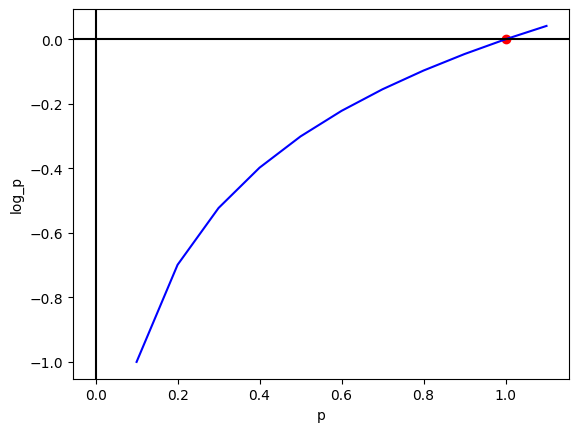

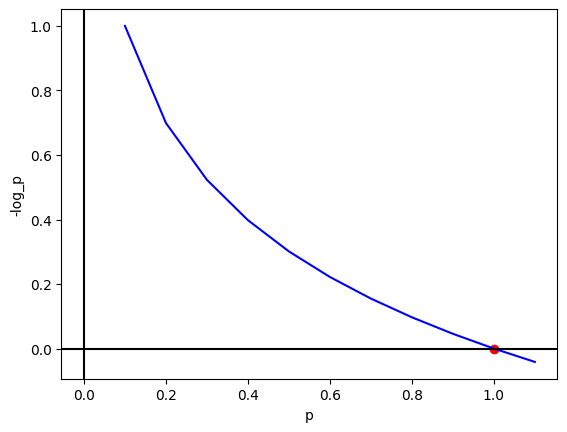

In [31]:
from math import log

p = np.arange(0,1.2,0.1)
log_p = np.log10(p)
log_p_neg = - (np.log10(p))

# 1
plt.plot(p, log_p, color = 'b')
plt.axvline(x=0,color = 'black')  # draw x =0 axes
plt.axhline(y=0,color = 'black')   # draw y =0 axes
plt.xlabel('p')
plt.ylabel('log_p')
plt.scatter(1.0,0.0,color='r')
plt.show()

# 2
plt.plot(p, log_p_neg, color = 'b')
plt.axvline(x=0, color = 'black')  # draw x =0 axes
plt.axhline(y=0, color = 'black')   # draw y =0 axes
plt.xlabel('p')
plt.ylabel('-log_p')
plt.scatter(1.0,0.0,color='r')
plt.show()

> 추가로, 예측 확률에 로그를 취하면 더 좋다.

확률의 범위는 0~1 사이인데 로그함수는 이 사이에선 음수가 되기 때문에 다시 음수를 취한 최종 손실 값은 양수가 된다.  <br>
0에 가까울 수록 로그함수는 큰 정수를 갖기 때문에 가시적으로 손실을 확인할 수 있다.

이진 분류에서 사용하는 이러한 손실 함수를 로지스틱 손실 함수, 또는 이진 크로스엔트로피 손실 함수라고 부른다.
다중 분류에서 사용하는 손실 함수는 크로스엔트로피 손실 함수라고 부른다.

+) 회귀 : 손실 함수로 평균 제곱 오차(MSE) 사용

<br>


#### 2) 에포크

In [37]:
# 훈련
sc.fit(train_scaled, train_target)

# 평가
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.6890756302521008
0.625


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


> ConvergenceWarning 경고 + 낮은 정확도

모델을 훈련시켜보니 지정한 반복 횟수 10번이 부족한 것처럼 보인다. <br>
=> 추가 에포크 실행 필요!


> 에포크 ?

'확률적(무작위, 랜덤)'
1) 경사를 내려올 때 전체 샘플을 사용하지 않고 일부 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾는다. <br>
2) 그 다음 훈련 세트에서 랜덤하게 또 다른 샘플을 선택해 경사를 조금 내려간다.<br>
3) 전체 샘플을 모두 사용할 때까지 반복한다. <br>
4) 목표 point에 도달하지 못했다면 다시 처음부터 시작한다. <br>
<br>
이렇게 훈련 세트를 한번 모두 사용하는 과정을 '에포크(epoch)'라고 부른다. 일반적으로 수십, 수백번 이상 에포크를 수행한다.

* 확률적 경사 하강법 : 한번 내려갈 때 마다 1개씩 샘플 꺼내기
* 미니배치 경사 하강법 : 여러개 샘플 꺼내기
* 배치 경사 하강법 : 전체 샘플 사용

즉, 확률적 경사 하강법은 훈련 세트 일부를 사용해 최적값으로 조금씩 이동하는 알고리즘으로, 훈련 데이터가 모두 준비되어있지 않고 계속 업데이트 되더라도 학습을 이어나갈 수 있다.

<br>

In [38]:
# 추가 훈련 (not 재훈련)
sc.partial_fit(train_scaled, train_target)

# 평가
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7394957983193278
0.55


에포크를 한 번 더 실행하니 정확도가 향상했지만, 아직 점수가 낮다. <br>
여러 에포크에서 더 훈련할 필요가 있겠군!

> 그런데 얼마나 더 훈련해야하지?

무작정 많이 반복할 순 없고 어떤 기준이 필요하겠다 <br>
=> **과대/과소 적합!**

<br>

In [50]:
import numpy as np
sc = SGDClassifier(loss = 'log_loss', random_state = 42, tol=None)
train_score = [] # 훈련 세트 점수
test_score = [] # 테스트 세트 점수
classes = np.unique(train_target)
# partial_fit() 메서드만 사용하려면 훈련 세트에 있는 전체 클래스 레이블(category)을 전달해줘야함

In [51]:
# 300번의 에포크
for _ in range(0,300): # '_' : 버리는 값을 집어넣는 용도
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

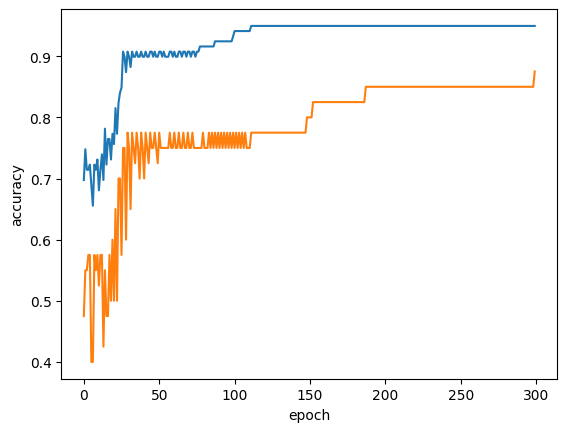

In [52]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# +) plt.plot(train_score)와 plt.plot(test_score)는 y축 값(점수)을 설정할 뿐 x축 값은 자동으로 인덱스가 사용.
# 즉, train_score와 test_score 리스트의 길이에 따라 x축 값이 자동으로 설정. 리스트의 인덱스가 x축 값.
# 예를 들어, 리스트 train_score가 300개의 값(300개의 에포크 동안의 점수)을 가지고 있다면, x축은 0부터 299까지의 값으로 자동 설정됩니다.

해당 그래프는 에포크가 진행됨에 따라 모델의 정확도를 나타낸 것이다.

확률적 경사 하강법 모델은 에포크 횟수에 따라 과소 적합이나 과대 적합이 될 수 있다. <br>
훈련 세트 점수는 에포크가 진행될수록 꾸준히 증가하지만 테스트 세트 점수는 어느 순간 감소한다.

이 모델의 경우 70번 정도가 가장 적합해보인다.

In [53]:
sc = SGDClassifier(loss = 'log_loss', max_iter = 70, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.9


훈련 세트와 테스트 세트 정확도 점수가 비교적 높게 나왔다!

+) SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춘다 <br>
: '조기 종료(early stopping). <br>
tol 매개변수를 None으로 지정하여 자동으로 멈추지 않고 지정한 에포크 수 무조건 반복

<br>


In [55]:
sc = SGDClassifier(loss = 'hinge', max_iter = 50, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9159663865546218
0.875


SGDClassifier은 여러 종류의 손실 함수를 loss 매개변수에 지정하여 다양한 머신러닝 알고리즘을 지원한다.

해당 매개변수의 기본값은 'hinge'로, Support Vector Machine이라는 또 다른 머신러닝 알고리즘을 위한 손실 함수이다.